In [161]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [162]:
df_over = pd.read_pickle('../data/cardio_processed_over.pkl')
df_over.head()

,age_category,BMI_category,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,totChol,sysBP,...,glucose,education_1.0,education_2.0,education_3.0,education_4.0,is_smoking_NO,is_smoking_YES,sex_F,sex_M,TenYearCHD
0,2.0,0.25,0,0,0,0,1.071429,0.15,-0.224138,0.722222,...,0.142857,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1
1,0.5,0.25,0,0,1,0,-0.928571,0.00,-0.379310,1.462963,...,-0.214286,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0
2,0.5,0.00,0,0,0,0,-0.214286,0.50,0.275862,-0.462963,...,1.142857,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
3,0.5,0.25,0,0,1,0,0.071429,1.00,-0.017241,1.092593,...,1.142857,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
4,2.0,0.25,0,0,0,0,1.071429,1.50,0.120690,0.296296,...,-0.071429,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0


In [163]:
df_ts = pd.read_pickle('../data/cardio_processed_ts.pkl')
df_ts.head()

,age_category,BMI_category,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,totChol,sysBP,...,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,is_smoking_NO,is_smoking_YES,sex_F,sex_M
0,2.0,0.25,0,0,0,0,1.071429,0.15,-0.224138,0.722222,...,0.142857,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.5,0.25,0,0,1,0,-0.928571,0.00,-0.379310,1.462963,...,-0.214286,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.5,0.00,0,0,0,0,-0.214286,0.50,0.275862,-0.462963,...,1.142857,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.5,0.25,0,0,1,0,0.071429,1.00,-0.017241,1.092593,...,1.142857,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,2.0,0.25,0,0,0,0,1.071429,1.50,0.120690,0.296296,...,-0.071429,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [164]:
response_var = 'TenYearCHD'

### LOGISTIC REGRESSION ON RANDOM_OVER_SAMPLE DATAFRAME

-----


In [165]:
X1 = df_over.drop(response_var, axis = 1)
y1 = df_over[response_var]

In [166]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 42)

In [167]:
log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

log_reg.fit(x_train1,y_train1)

y_pred_train_1 = log_reg.predict(x_train1)
y_pred_test_1 = log_reg.predict(x_test1)

In [168]:
train_df_over = pd.DataFrame({'Real_Over': y_train1, 'Predicted_Over': y_pred_train_1, 'Set_Over': ['Train_Over']*len(y_train1)})
test_df_over  = pd.DataFrame({'Real_Over': y_test1,  'Predicted_Over': y_pred_test_1,  'Set_Over': ['Test_Over']*len(y_test1)})
results_over = pd.concat([train_df_over,test_df_over], axis = 0)
results_over.sample(5)

,Real_Over,Predicted_Over,Set_Over
5753,1,0,Test_Over
3848,1,1,Test_Over
4752,1,1,Train_Over
2287,0,1,Test_Over
3165,0,0,Test_Over


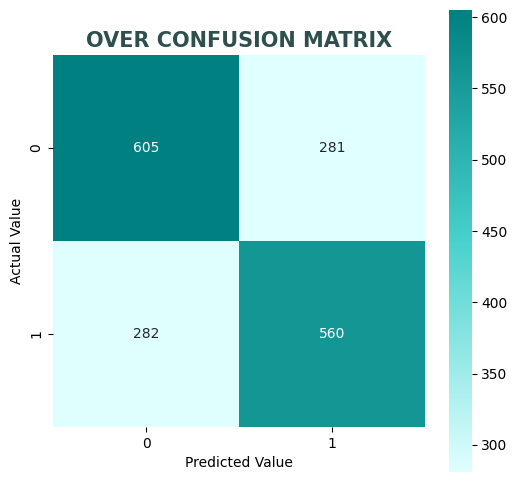

In [169]:
mat_lr1 = confusion_matrix(y_test1, y_pred_test_1)

my_heatmap_palette = LinearSegmentedColormap.from_list('Gradient', ['lightcyan', 'mediumturquoise', 'teal'], N=1000)

plt.figure(figsize = (6, 6))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = my_heatmap_palette)

plt.title('OVER CONFUSION MATRIX', fontsize = 15, color = 'darkslategray', fontweight = "bold")
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [170]:
def metrics(real_classes_test, predicted_classes_test, real_classes_train, predicted_classes_train, model):
    
    accuracy_test = accuracy_score(real_classes_test, predicted_classes_test)
    precision_test = precision_score(real_classes_test, predicted_classes_test)
    recall_test = recall_score(real_classes_test, predicted_classes_test)
    f1_test = f1_score(real_classes_test, predicted_classes_test)
    kappa_test = cohen_kappa_score(real_classes_test, predicted_classes_test)

    accuracy_train = accuracy_score(real_classes_train, predicted_classes_train)
    precision_train = precision_score(real_classes_train, predicted_classes_train)
    recall_train = recall_score(real_classes_train, predicted_classes_train)
    f1_train = f1_score(real_classes_train, predicted_classes_train)
    kappa_train = cohen_kappa_score(real_classes_train, predicted_classes_train)
        
    dataframe = pd.DataFrame({'accuracy': [accuracy_test, accuracy_train], 
                        'precision': [precision_test, precision_train],
                        'recall': [recall_test, recall_train], 
                        'f1': [f1_test, f1_train],
                        'kappa': [kappa_test, kappa_train],
                        'set': ['test', 'train']})
    
    dataframe['model'] = model
    return dataframe

In [171]:
logistic_over_results = metrics(y_test1, y_pred_test_1, y_train1, y_pred_train_1, 'OVER Logistic Regression')
logistic_over_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.674190,0.665874,0.665083,0.665478,0.347938,test,OVER Logistic Regression
1,0.668734,0.669075,0.681885,0.675419,0.337250,train,OVER Logistic Regression


### LOGISTIC REGRESSION ON TOKEN_SMOTE DATAFRAME

-----

In [172]:
X2 = df_ts.drop(response_var, axis = 1)
y2 = df_ts[response_var]

In [173]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 42)

In [174]:
log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)

log_reg.fit(x_train2,y_train2)

y_pred_train_2 = log_reg.predict(x_train2)
y_pred_test_2 = log_reg.predict(x_test2)

In [175]:
train_df_ts = pd.DataFrame({'Real_ts': y_train2, 'Predicted_ts': y_pred_train_2, 'Set_ts': ['Train_ts']*len(y_train2)})
test_df_ts  = pd.DataFrame({'Real_ts': y_test2,  'Predicted_ts': y_pred_test_2,  'Set_ts': ['Test_ts']*len(y_test2)})
results_ts = pd.concat([train_df_ts,test_df_ts], axis = 0)
results_ts.sample(5)

,Real_ts,Predicted_ts,Set_ts
469,0,0,Train_ts
240,0,0,Test_ts
2477,1,0,Test_ts
2435,0,0,Train_ts
3015,0,0,Train_ts


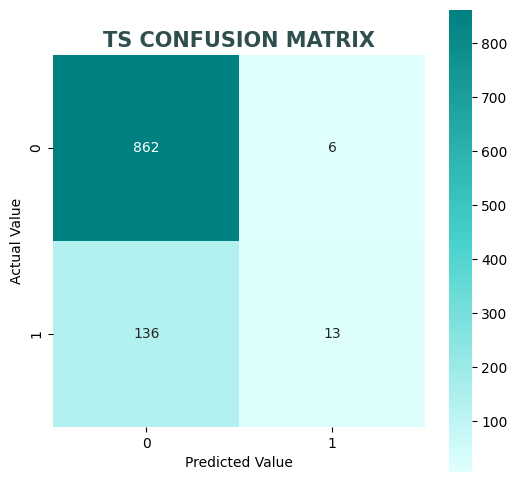

In [176]:
mat_lr2 = confusion_matrix(y_test2, y_pred_test_2)

my_heatmap_palette = LinearSegmentedColormap.from_list('Gradient', ['lightcyan', 'mediumturquoise', 'teal'], N=1000)

plt.figure(figsize = (6, 6))
sns.heatmap(mat_lr2, square=True, annot=True, fmt="d", cmap = my_heatmap_palette)

plt.title('TS CONFUSION MATRIX', fontsize = 15, color = 'darkslategray', fontweight = "bold")
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [177]:
logistic_ts_results = metrics(y_test2, y_pred_test_2, y_train2, y_pred_train_2, 'TS Logistic Regression')
logistic_ts_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.860374,0.684211,0.087248,0.154762,0.125791,test,TS Logistic Regression
1,0.856300,0.744186,0.088398,0.158025,0.129837,train,TS Logistic Regression


### SAVE RESULTS

-----

In [178]:
all_results = pd.concat([logistic_over_results, logistic_ts_results], axis = 0)
all_results

,accuracy,precision,recall,f1,kappa,set,model
0,0.674190,0.665874,0.665083,0.665478,0.347938,test,OVER Logistic Regression
1,0.668734,0.669075,0.681885,0.675419,0.337250,train,OVER Logistic Regression
0,0.860374,0.684211,0.087248,0.154762,0.125791,test,TS Logistic Regression
1,0.856300,0.744186,0.088398,0.158025,0.129837,train,TS Logistic Regression


In [180]:
all_results.to_pickle('../data/LR_results.pkl')